# Compare the properties of several spectral filters

In [10]:
#Import base Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Despite the practical ubiquity of the Fourier transform, the infinite-time support of the Fourier kernal (sinusoids) makes it difficult to localize in the time domain any changes in signal frequency characteristics.

Consider the following case:

Generate 2 signals, ya and yb, over a linspace of 100000 timepoints, x.

ya is the sum of four sinusoids, oscillating at different frequencies.

yb is a concatenation of the same four sinusoids.

Plot the fourier transform of each.

In [11]:
from scipy.fftpack import fft

def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values


/home/jbillings/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


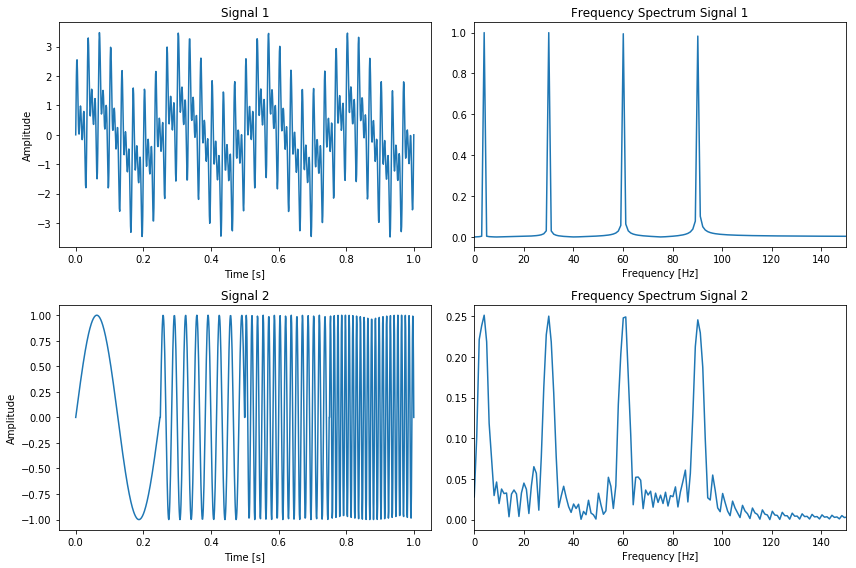

In [150]:
t_n = 1
N = 1000
T = t_n / N
f_s = 1/T

xa = np.linspace(0, t_n, num=N)
xb = np.linspace(0, t_n/4, num=N/4)

frequencies = [4, 30, 60, 90]
y1a, y1b = np.sin(2*np.pi*frequencies[0]*xa), np.sin(2*np.pi*frequencies[0]*xb)
y2a, y2b = np.sin(2*np.pi*frequencies[1]*xa), np.sin(2*np.pi*frequencies[1]*xb)
y3a, y3b = np.sin(2*np.pi*frequencies[2]*xa), np.sin(2*np.pi*frequencies[2]*xb)
y4a, y4b = np.sin(2*np.pi*frequencies[3]*xa), np.sin(2*np.pi*frequencies[3]*xb)

composite_signal1 = y1a + y2a + y3a + y4a
composite_signal2 = np.concatenate([y1b, y2b, y3b, y4b])

f_values1, fft_values1 = get_fft_values(composite_signal1, T, N, f_s)
f_values2, fft_values2 = get_fft_values(composite_signal2, T, N, f_s)

fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
axarr[0,0].plot(xa, composite_signal1)
axarr[0,0].set_title('Signal 1')
axarr[0,0].set_ylabel('Amplitude')
axarr[0,0].set_xlabel('Time [s]')

axarr[1,0].plot(xa, composite_signal2)
axarr[1,0].set_title('Signal 2')
axarr[1,0].set_ylabel('Amplitude')
axarr[1,0].set_xlabel('Time [s]')

axarr[0,1].plot(f_values1, fft_values1)
axarr[0,1].set_title('Frequency Spectrum Signal 1')
axarr[0,1].set_xlabel('Frequency [Hz]')
axarr[0,1].set_xlim(left=0, right=150) 

axarr[1,1].plot(f_values2, fft_values2)
axarr[1,1].set_title('Frequency Spectrum Signal 2')
axarr[1,1].set_xlabel('Frequency [Hz]')
axarr[1,1].set_xlim(left=0, right=150)

plt.tight_layout()
plt.show()

As an alternative to Fourier-based spectral analysis, several groups have developed the use of short time oscellations called "wavelets." The use of kernels with finite temporal support produces a spectral analysis that localizes non-stationarities of the signal's spectral properties in the time domain.

In [7]:
%%html
<img src="Images/FourierVsWavelet.png" style="width:620px" style="height:620px">

In one implementation of wavelet transforms, called the continuous wavelet transform (CWT), a mother wavelet is stretched and/or compressed in the time domain to yield filters sensitive to, respectively, longer and/or shorter frequencies. Several such filters are convolved with the input signal to yield a time/frequency spectrogram.

In [8]:
%%html
<img src="Images/CWTScaling.png" style="width:620px" style="height:620px">

Let's take a look at how the CWT tackles the previous test signals:

In [13]:
import pywt

def plot_wavelet(time, signal, scales, 
                 waveletname = 'cmor1.5-1.0', 
                 cmap = 'plasma', 
                 title = 'Wavelet coefficient magnitudes of signal', 
                 ylabel = 'Approximate frequencies', 
                 xlabel = 'Timepoints',
                 dt = None):    
    
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients))
    
    fig, ax = plt.subplots(figsize=(15, 10))
    im = ax.contourf(time, frequencies, power, extend='both',cmap=cmap)
    
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    
    cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")
    plt.show()


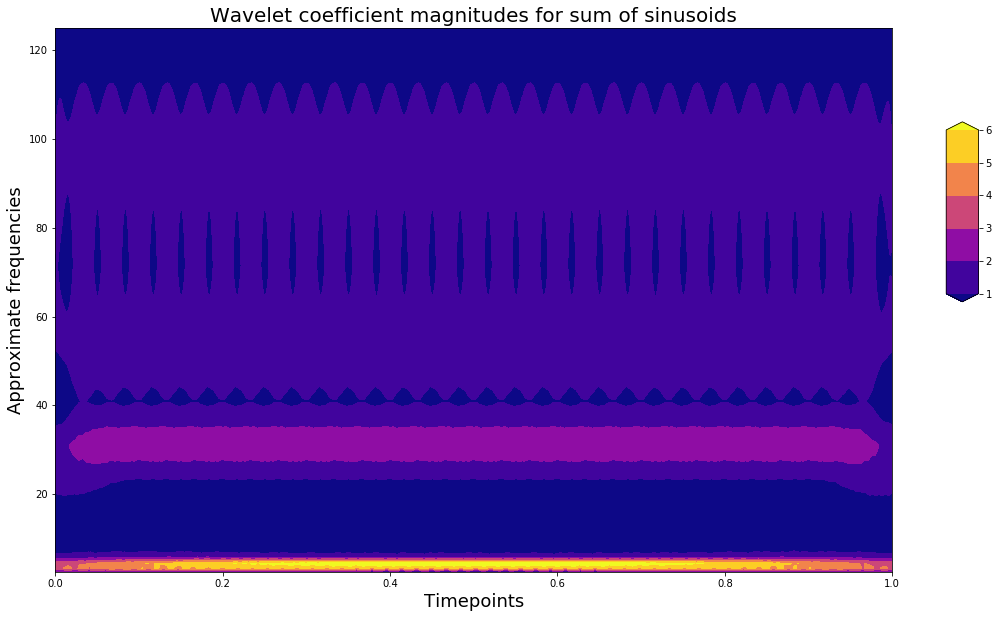

In [158]:
title = 'Wavelet coefficient magnitudes for sum of sinusoids'
scales = np.logspace(np.log10(8),np.log10(400),num=15)
plot_wavelet(xa, composite_signal1, scales, dt=1/N, title=title)

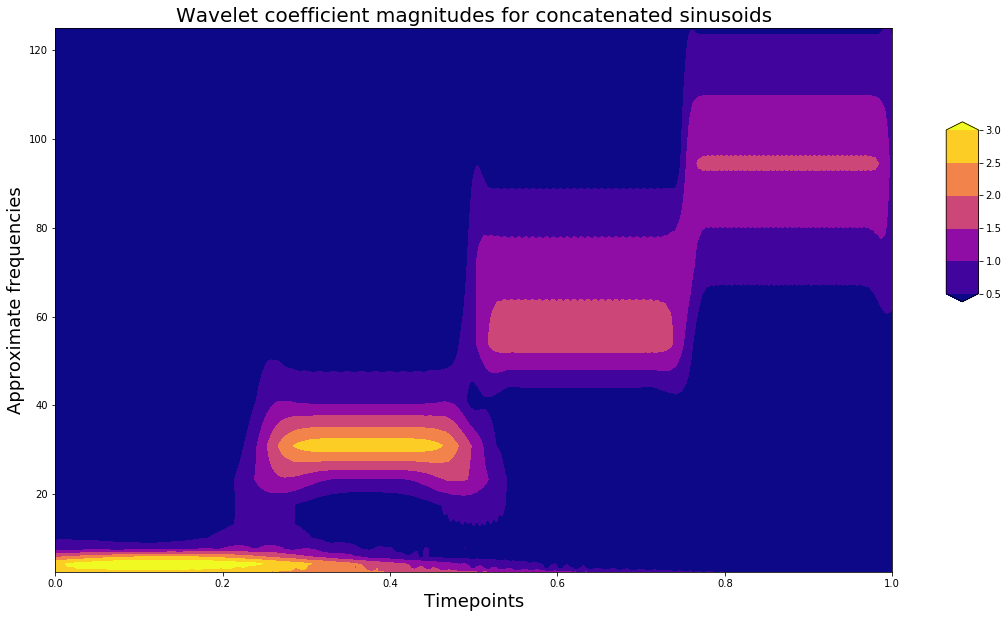

In [157]:
title = 'Wavelet coefficient magnitudes for concatenated sinusoids'
scales = np.logspace(np.log10(8),np.log10(400),num=15)
plot_wavelet(xa, composite_signal2, scales, dt=1/N, title=title)

Fourier methods may make up for the lack of sensitivity to temporal changes by passing the kernal through a box-car windowing function to produce a short-time Fourier transform. However, this method requires the analyst to choose a characteristic scale in the time-frequency domain implemented across the entire analysis. By contrast, wavelet methods are inheriently adaptive, providing increased temporal sensitivity at higher frequencies, and increased frequency sensitivity over longer time scales.


In [1]:
%%html
<img src="Images/Comparisonoftransformations.jpg" style="width:420px" style="height:420px">

Several examples of wavelet kernels are provided below. Each affords some unique properties useful for various situations.

In [23]:
print(pywt.families(short=False))

['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']


The "continuous wavelet transform" in the above example may use the following continuous wavelets

In [162]:
print(pywt.wavelist(kind='continuous'))

['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']


/home/jbillings/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


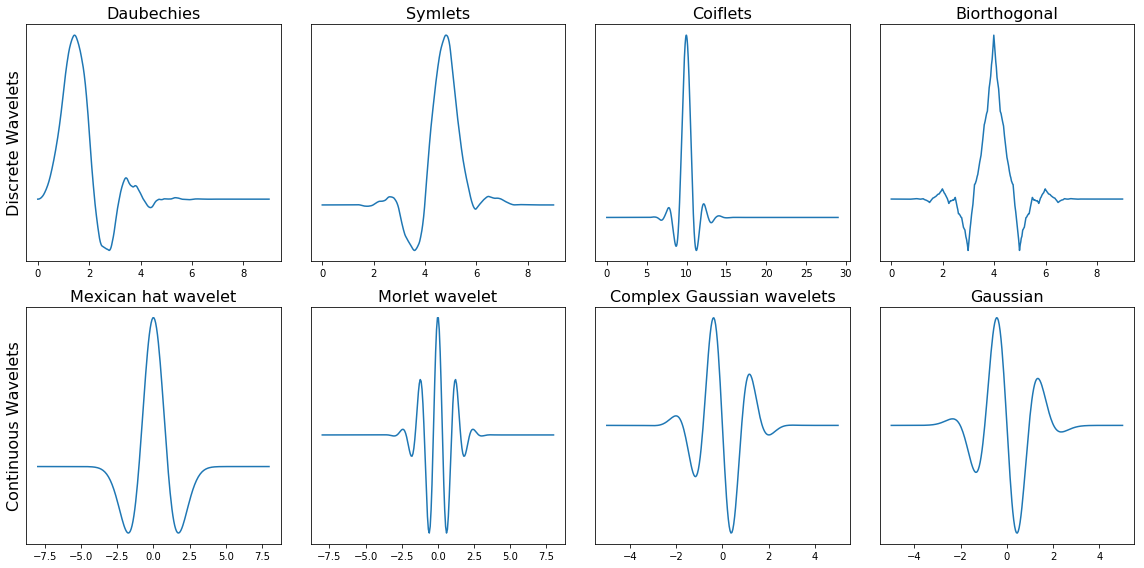

In [24]:
discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior2.4']
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']

list_list_wavelets = [discrete_wavelets, continuous_wavelets]
list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]

fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
for ii, list_wavelets in enumerate(list_list_wavelets):
    func = list_funcs[ii]
    row_no = ii
    for col_no, waveletname in enumerate(list_wavelets):
        wavelet = func(waveletname)
        family_name = wavelet.family_name
        biorthogonal = wavelet.biorthogonal
        orthogonal = wavelet.orthogonal
        symmetry = wavelet.symmetry
        if ii == 0:
            _ = wavelet.wavefun()
            wavelet_function = _[0]
            x_values = _[-1]
        else:
            wavelet_function, x_values = wavelet.wavefun()
        if col_no == 0 and ii == 0:
            axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
        if col_no == 0 and ii == 1:
            axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
        axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
        axarr[row_no, col_no].plot(x_values, wavelet_function)
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])

plt.tight_layout()
plt.show()

Rather than scanning a signal's spectral properties over a continuous range of pseudo-frequencies, it is also possible to use a descritized and "critically-sampled" filterbank, i.e., the Discrete Wavelet Transform (DWT). The benefit here is that the number of resulting wavelet coefficients is on the order of the number of data points of the input signal.

The form of the DWT is as follows:

In [167]:
%%html
<img src="Images/Diagram_DWT.png" style="width:750px" style="height:600px">

The DWT filtration schema is shown in part (a). Here x(n) is an input signal; c(n) are the low-frequency wavelet coefficients (the approximation); and d(j,n) are successively higher frequency (increasing j) wavelet coefficients (the details). The schema works by filtering x(n) with a low-pass filter, h_0(n), and a high-pass filter, h_1(n). Successive filtering steps operate on only the low-pass filtered coefficients after downsampling by 2, thereby achieving a critically sampled filtration.

The reconstruction process in part (b) is simply the reverse of the deconstruction process. Albiet with reconstruction filters replacing deconstruction filters, and with successive upsampling rather than downsampling.

Consider the use of the DWT in the examination of a chirp function:

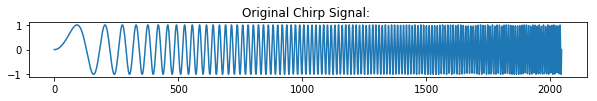

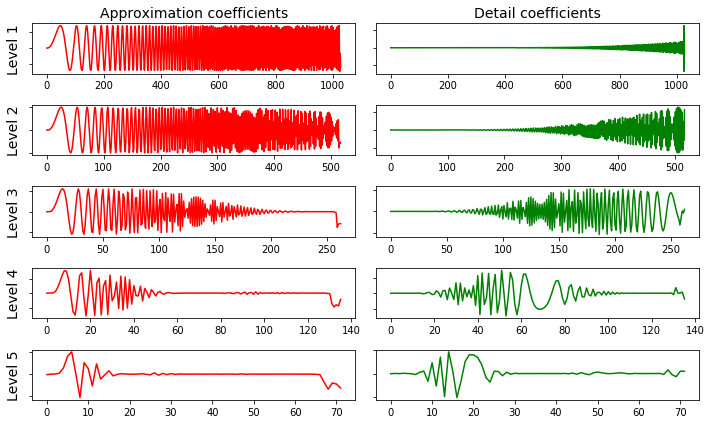

In [15]:
x = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(250 * np.pi * x**2)
    
fig, ax = plt.subplots(figsize=(10,1))
ax.set_title("Original Chirp Signal: ")
ax.plot(chirp_signal)
plt.show()
    
data = chirp_signal
waveletname = 'sym5'
 
fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(10,6))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()

Discrete wavelet transforms make use of orthogonal wavelet functions that boast perfect signal reconstruction and compact support. One may adjust the precision of the filter-bank's cut-off frequencies by increasing the number of taps for each filter at the cost of increasing the temporal support. Waveletes may observe characteristic oscillatory behavior at larger or smaller scales by increasing or decreasing the level of refinement.

['db1', 'db2', 'db3', 'db4', 'db5']


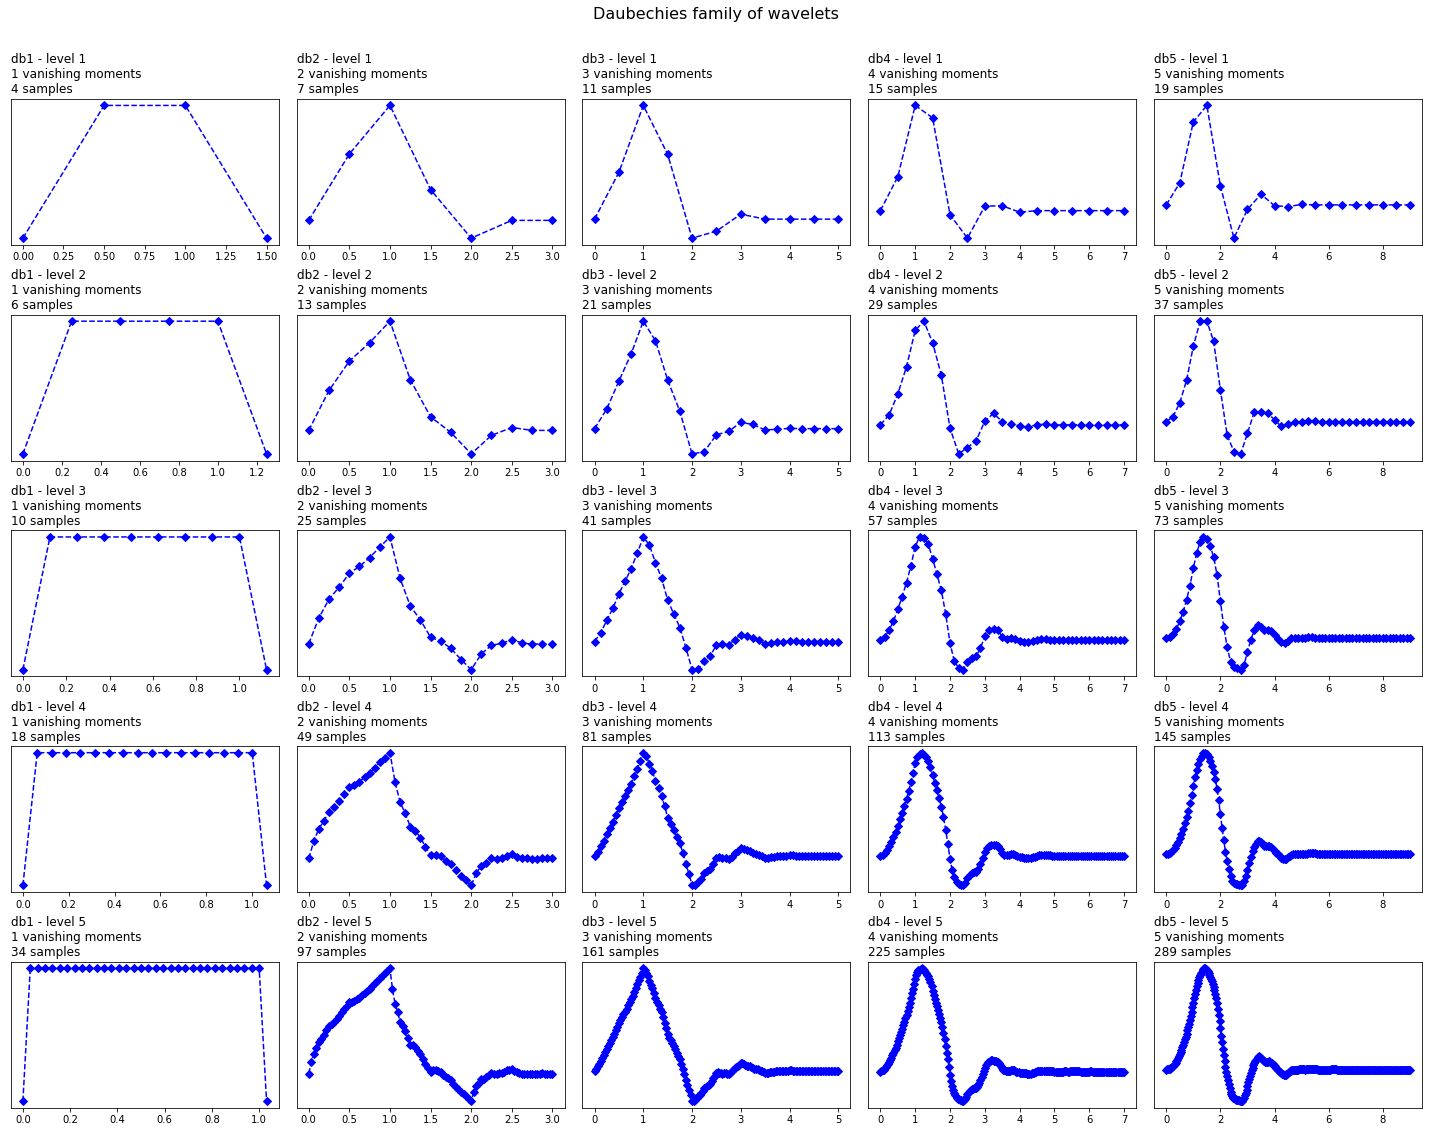

In [26]:
import pywt
import matplotlib.pyplot as plt
 
db_wavelets = pywt.wavelist('db')[:5]
print(db_wavelets)
 
fig, axarr = plt.subplots(ncols=5, nrows=5, figsize=(20,16))
fig.suptitle('Daubechies family of wavelets', fontsize=16)
for col_no, waveletname in enumerate(db_wavelets):
    wavelet = pywt.Wavelet(waveletname)
    no_moments = wavelet.vanishing_moments_psi
    family_name = wavelet.family_name
    for row_no, level in enumerate(range(1,6)):
        wavelet_function, scaling_function, x_values = wavelet.wavefun(level = level)
        axarr[row_no, col_no].set_title("{} - level {}\n{} vanishing moments\n{} samples".format(
            waveletname, level, no_moments, len(x_values)), loc='left')
        axarr[row_no, col_no].plot(x_values, wavelet_function, 'bD--')
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

One failing of the standard DWT is it's poor consistency when evaluating similar features that are slightly shifted from one another.

In [169]:
from matplotlib.pylab import *
import dtcwt

# Generate a 300x2 array of a step function and a shifted step function
vecs = np.zeros((300,2))
vecs[100:120,0]=1
vecs[103:123,1]=1

x = np.linspace(0, 299)

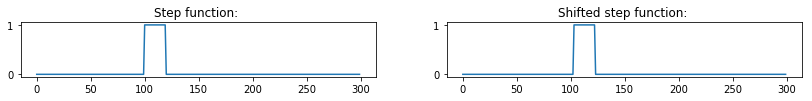

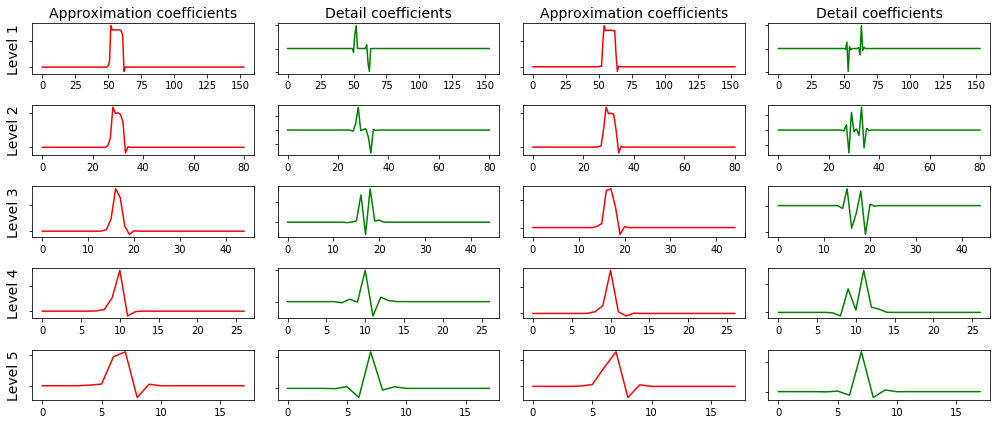

In [183]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,1))
ax[0].set_title("Step function: ")
ax[0].plot(vecs[:,0])
ax[1].set_title("Shifted step function: ")
ax[1].plot(vecs[:,1])

plt.show()

waveletname = 'sym5'

data = vecs[:,0] 
fig, axarr = plt.subplots(nrows=5, ncols=4, figsize=(14,6))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
    
data = vecs[:,1] 
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 2].plot(data, 'r')
    axarr[ii, 3].plot(coeff_d, 'g')
    axarr[ii, 2].set_yticklabels([])
    if ii == 0:
        axarr[ii, 2].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 3].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 3].set_yticklabels([])

plt.tight_layout()
plt.show()

This lack of shift invariance is resolved by introducing a second filterbank that is an approximate Hilbert transform from the first. Theoretically, this solution immitates the fourier transform's use of both a real filter bank of cosines and an imaginary filterbank of 90 degree shifted cosines, i.e., sinusoids.

With only 2x the total number of wavelet transform coefficients, the dual tree complex wavelt transform (DTCWT) gains near shift-invariance and several other useful properties related to the additional phase encoding information. For additional details, see Selesnick (2005) below.

In [189]:
%%html
<img src="Images/Diagram_DTCWT.png" style="width:750px" style="height:600px">

The implementation of the DTCWT is very similar to that of the DWT with some provisions. Note that the initial filters are given a superscript (1). This denotes the fact that the first filters of the DTCWT should be different from those in the latter stages. This is because, in later stages, the interceeding downsampling requires additional care to ensure that the two trees remain approximate Hilbert transforms of one another. In the first stage, all that is required is that the input signal is shifted by one time point in one tree. These first filters may be any of the standard discrete wavelet transforms. Additionally, the DTCWT gains some additional stability by alternatively utilizing filters g and h in successive filtration steps of each tree.

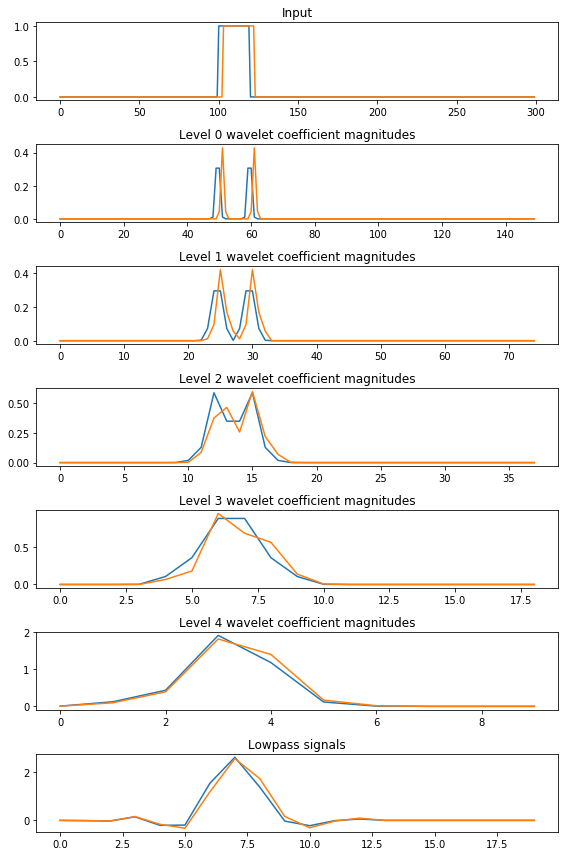

In [188]:
# Show input
fig, axarr = plt.subplots(nrows=7, ncols=1, figsize=(8,12))

axarr[0].plot(vecs)
axarr[0].set_title('Input')

# 1D transform, 5 levels
transform = dtcwt.Transform1d()
vecs_t = transform.forward(vecs, nlevels=5)

# Show level 2 highpass coefficient magnitudes
for i in range(5):
    axarr[i+1].plot(np.abs(vecs_t.highpasses[i]))
    axarr[i+1].set_title('Level ' + str(i) + ' wavelet coefficient magnitudes')

# Show last level lowpass image
axarr[6].plot(vecs_t.lowpass)
axarr[6].set_title('Lowpass signals')

plt.tight_layout()
plt.show()

References:
    
    Selesnick, I. W., Baraniuk, R. G., & Kingsbury, N. C. (2005). The dual-tree complex wavelet transform. IEEE Signal Processing Magazine, 22(6), 123–151. https://doi.org/10.1109/MSP.2005.1550194
    
    Daubechies, I. (1988). Orthonormal bases of compactly supported wavelets. Communications on Pure and Applied Mathematics, 41(7), 909–996. https://doi.org/10.1002/cpa.3160410705